## Iris Dataset Machine learning Project

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


## Data

Import the iris.csv data 

In [2]:
iris_data = pd.read_csv('iris.csv')

In [3]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1 cm,35.0 mm,1.4 cm,0.2 cm,setosa
1,4.9 cm,30.0 mm,1.4 cm,0.2 cm,setosa
2,4.7 cm,32.0 mm,1.3 cm,0.2 cm,setosa
3,4.6 cm,31.0 mm,1.5 cm,0.2 cm,setosa
4,5.0 cm,36.0 mm,1.4 cm,0.2 cm,setosa
5,5.4 cm,39.0 mm,1.7 cm,0.4 cm,setosa
6,4.6 cm,34.0 mm,1.4 cm,0.3 cm,setosa
7,5.0 cm,34.0 mm,1.5 cm,0.2 cm,setosa
8,4.4 cm,29.0 mm,1.4 cm,0.2 cm,setosa
9,4.9 cm,31.0 mm,1.5 cm,0.1 cm,setosa


## Discovering the data 

In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
iris_data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris_data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [8]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1 cm,35.0 mm,1.4 cm,0.2 cm,setosa
1,4.9 cm,30.0 mm,1.4 cm,0.2 cm,setosa
2,4.7 cm,32.0 mm,1.3 cm,0.2 cm,setosa
3,4.6 cm,31.0 mm,1.5 cm,0.2 cm,setosa
4,5.0 cm,36.0 mm,1.4 cm,0.2 cm,setosa
...,...,...,...,...,...
145,6.7 cm,30.0 mm,5.2 cm,2.3 cm,virginica
146,6.3 cm,25.0 mm,5.0 cm,1.9 cm,virginica
147,6.5 cm,30.0 mm,5.2 cm,2.0 cm,virginica
148,6.2 cm,34.0 mm,5.4 cm,2.3 cm,virginica


## Cleaning the data 

In [9]:
#Strip ' cm' and ' mm' from each data point, and convert them to floats
#dataset 1
iris_data['sepal_length'] = list(map(lambda x: x[:-2], iris_data['sepal_length'].values))
iris_data['sepal_width'] = list(map(lambda x: x[:-2], iris_data['sepal_width'].values))
iris_data['petal_length'] = list(map(lambda x: x[:-2], iris_data['petal_length'].values))
iris_data['petal_width'] = list(map(lambda x: x[:-2], iris_data['petal_width'].values))


In [10]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,35.0,1.4,0.2,setosa
1,4.9,30.0,1.4,0.2,setosa
2,4.7,32.0,1.3,0.2,setosa
3,4.6,31.0,1.5,0.2,setosa
4,5.0,36.0,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,30.0,5.2,2.3,virginica
146,6.3,25.0,5.0,1.9,virginica
147,6.5,30.0,5.2,2.0,virginica
148,6.2,34.0,5.4,2.3,virginica


In [11]:
iris_data.dtypes

sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
species         object
dtype: object

In [12]:
# convert them to floats
iris_data.loc[:,'sepal_length'] = pd.to_numeric(iris_data.loc[:,'sepal_length'],errors='coerce')
iris_data.loc[:,'sepal_width'] = pd.to_numeric(iris_data.loc[:,'sepal_width'],errors='coerce')
iris_data.loc[:,'petal_length'] = pd.to_numeric(iris_data.loc[:,'petal_length'],errors='coerce')
iris_data.loc[:,'petal_width'] = pd.to_numeric(iris_data.loc[:,'petal_width'],errors='coerce')

The dataset sepal width is mistakenly 10 times larger than normal which is impossible so we reduced it by 10 times. 

In [13]:
iris_data['sepal_width'] = iris_data['sepal_width'].div(10)

In [14]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Statistical properties of data 

In [15]:
iris_data.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [16]:
iris_data.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [17]:
iris_data.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [18]:
iris_data.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [19]:
iris_data.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

## Summary statistics
It summarize the central tendency, dispersion and dataset distribution 

In [20]:
summary = iris_data.describe().T

In [21]:
summary.head()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


From the summary, we can analyse that there is huge range in the size of Sepal Length and Petal Length also verified by their higher standard deviation among other. Further, we will use exploratory analysis if size is related to the iris species. 

## Exploratory Data Analysis (EDA)

## Boxplot 

It visually compares distributions of sepal length, sepal width, petal length, petal width based on numerical data through their quartiles.

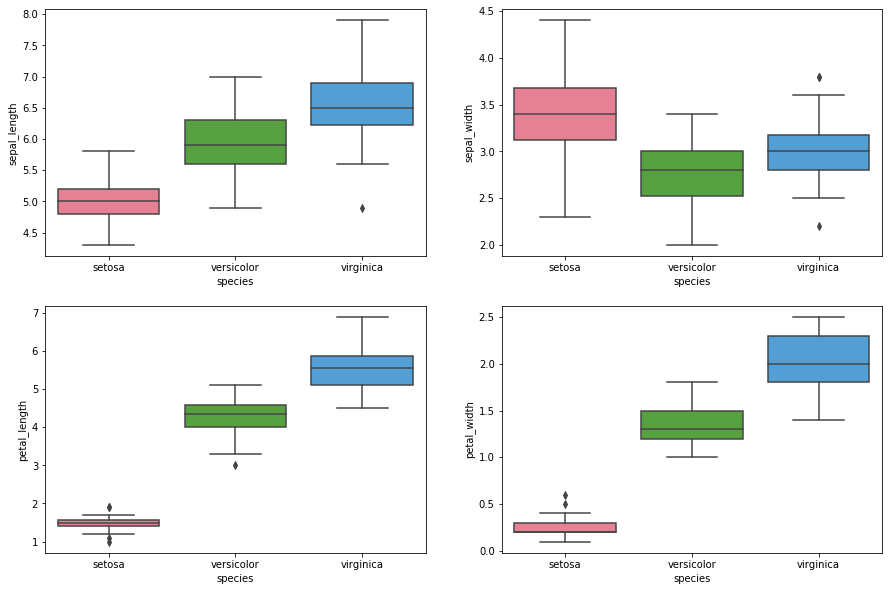

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species', y = 'sepal_length', palette="husl", data=iris_data)
plt.subplot(2,2,2)
sns.boxplot(x='species', y = 'sepal_width', palette="husl", data=iris_data)

plt.subplot(2,2,3)
sns.boxplot(x='species', y = 'petal_length',palette="husl",  data=iris_data)
plt.subplot(2,2,4)
sns.boxplot(x='species', y = 'petal_width', palette="husl", data=iris_data)

## Pairplot

Relationships between variables across multiple dimensions

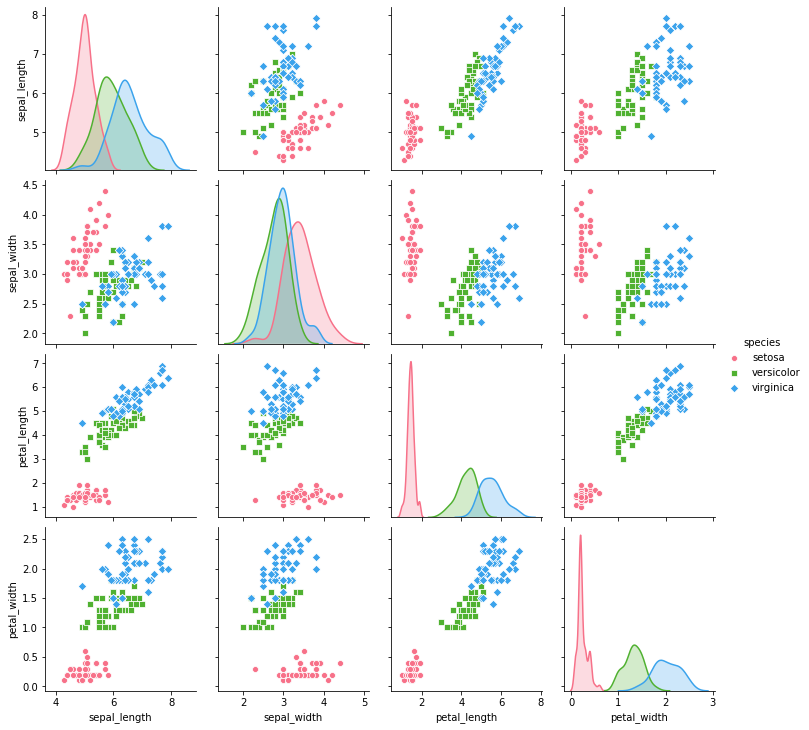

In [23]:
sns.pairplot(iris_data, hue="species",palette="husl", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

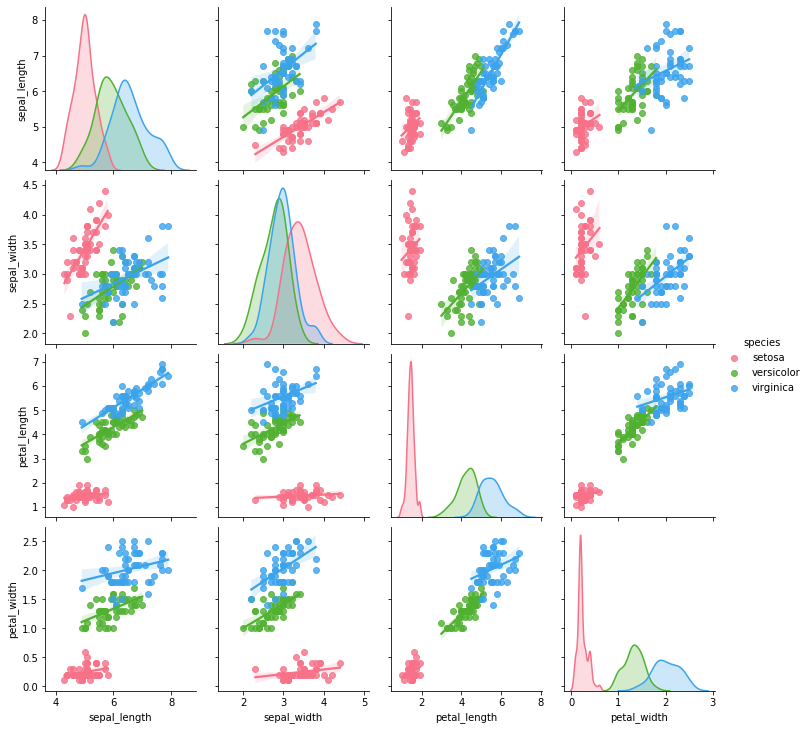

In [24]:
sns.pairplot(iris_data,hue="species", kind='reg',  palette="husl")
plt.show()

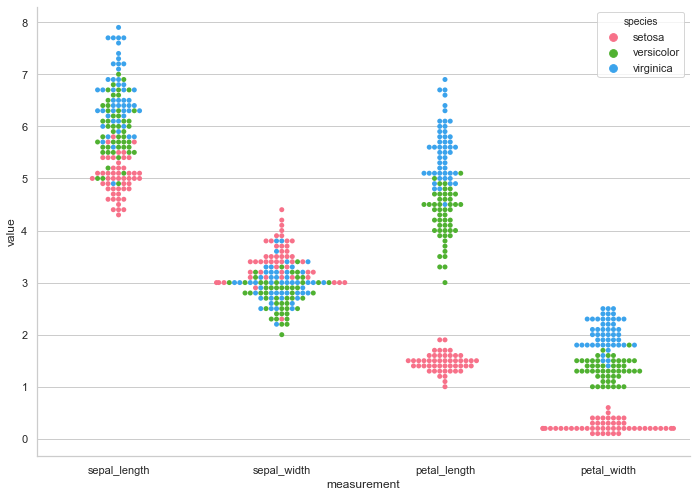

In [25]:
sns.set(style="whitegrid", palette="husl", rc={'figure.figsize':(11.7,8.27)})

# "Melt" the dataset
iris2 = pd.melt(iris_data, "species", var_name="measurement")

# Draw a categorical scatterplot
sns.swarmplot(x="measurement", y="value", hue="species",palette="husl", data=iris2)

#Remove the top and right spines from plot
sns.despine()

#show plot
import matplotlib.pyplot as plt
plt.show()


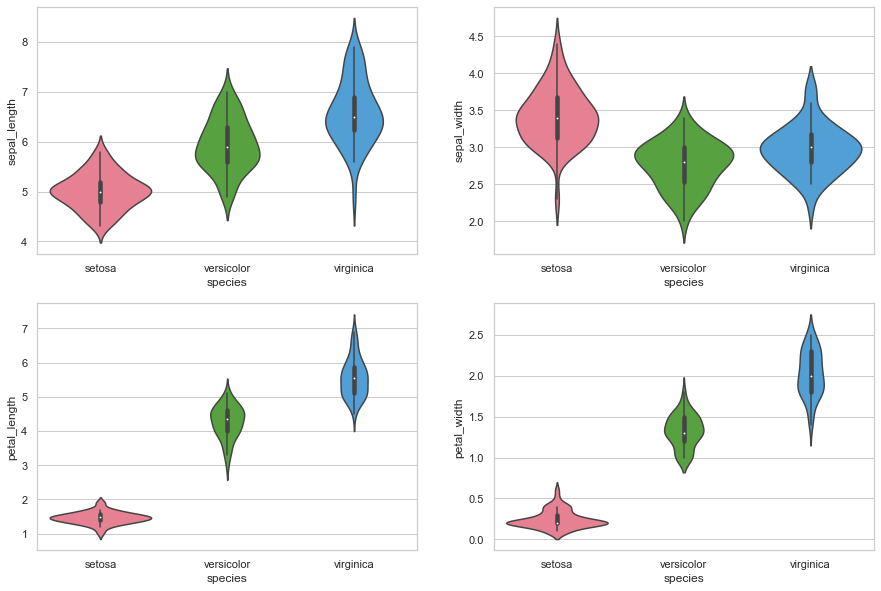

In [26]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal_length', palette="husl",data=iris_data)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal_width', palette="husl", data=iris_data)

plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal_length', palette="husl", data=iris_data)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal_width',palette="husl", data=iris_data)

## Classification problem 

We use classification algorithm to build a model. 

Attributes: These are property or also known as features are used to determine its classification. Here, attributes are sepal length, sepal width, petal length and petal width. 

Targets or Outputs are 3 flower species

In [27]:
import sklearn

In [28]:
# importing alll the necessary packages to use the various classification algorithms
import sklearn
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [29]:
iris_data.shape

(150, 5)

While training any algorithm, the number of features and their correlation plays an important role. If many of the features are highly correlated, then training an algorithm with all these features will reduce an accuracy. Feature selection should be done carefully. Existing dataset has less features although there is some correlation. 

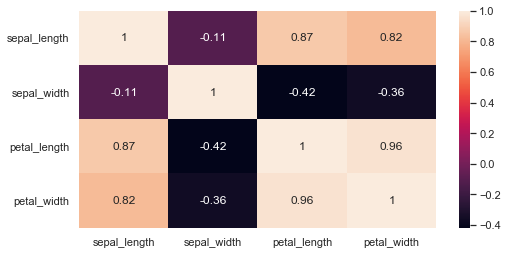

In [30]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True) # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

From heatmap we can observe that sepal length and width are not correlated but petla length and width are coorrelated. We will use all the features for training the algorithm and check the accuracy. 

We will use petal and sepal feature to check the accuracy in the algorithm .

So, we will split dataset into training and testing dataset. Testing dataset is generally smaller than training since more training datasets the model will be better. 

## Splitting the data into training and testing dataset

In [31]:
train, test = train_test_split(iris_data, test_size = 0.3) # dataset is split into 70% training and 30% testing
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [32]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
103,6.3,2.9,5.6,1.8,virginica
47,4.6,3.2,1.4,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
3,4.6,3.1,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
38,4.4,3.0,1.3,0.2,setosa


In [33]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.species

In [34]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
103,6.3,2.9,5.6,1.8
47,4.6,3.2,1.4,0.2
120,6.9,3.2,5.7,2.3
41,4.5,2.3,1.3,0.3


In [35]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
100,6.3,3.3,6.0,2.5
111,6.4,2.7,5.3,1.9
77,6.7,3.0,5.0,1.7
21,5.1,3.7,1.5,0.4
76,6.8,2.8,4.8,1.4


In [36]:
train_y.head()

13        setosa
103    virginica
47        setosa
120    virginica
41        setosa
Name: species, dtype: object

In [37]:
test_y.head()

100     virginica
111     virginica
77     versicolor
21         setosa
76     versicolor
Name: species, dtype: object

## Support Vector Machine SVM

In [38]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))


The accuracy of the SVM is:  0.9555555555555556


## Logistic Regression

In [39]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9555555555555556


## Decision Tree

In [40]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9555555555555556


## K-Nearest Neighbors

In [41]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9555555555555556


## Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x16f06006e88>,
 <a list of 10 Text xticklabel objects>)

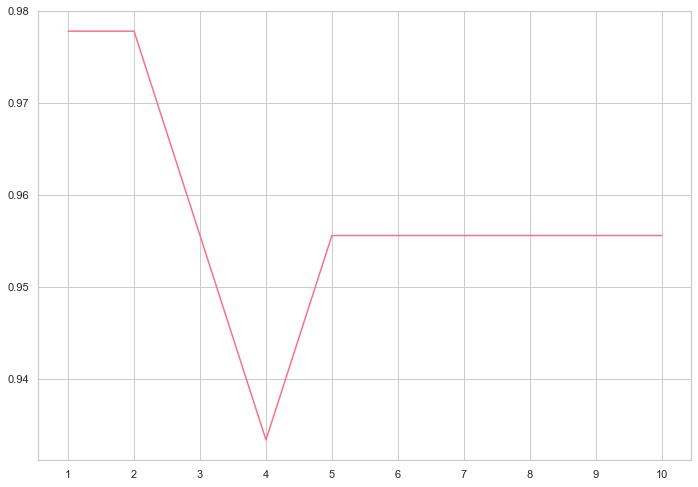

In [42]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

Above graph shows accuracy of KNN models using different values of n

## All the features of iris models are used, lets use petal and sepal 

## training and testing data for petals and sepals

In [43]:
petal = iris_data[['petal_length','petal_width','species']]
sepal = iris_data[['sepal_length','sepal_width','species']]

## Iris Petal

In [44]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) 

train_x_p = train_p[['petal_length','petal_width']]
train_y_p = train_p.species

test_x_p = test_p[['petal_length','petal_width']]
test_y_p = test_p.species

## Iris Sepal

In [45]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['sepal_length','sepal_width']]
train_y_s = train_s.species

test_x_s = test_s[['sepal_length','sepal_width']]
test_y_s = test_s.species

## SVM algorithm

In [46]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


## Logistic Regression

In [47]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


## Decision Tree

In [48]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


## K-Nearest Neighbors

In [49]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


## Analysis
From the mathematical models we used we can confirm that using petal features gives more accuracy.
Further it was validated by the heatmap high correlation between petal length and width than that of sepal length and width. 